# Preliminary Analysis


### Imports

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras import Sequential
from keras.layers import Activation
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, Flatten
from google.colab import drive, files

### Load Dataset

In [3]:
# df = pd.read_csv("sudoku.csv")
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/255 Data Mining/sudoku-3m.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Basic Statistics

In [5]:
df.shape

(3000000, 5)

In [6]:
df.head()

,id,puzzle,solution,clues,difficulty
0,1,1..5.37..6.3..8.9......98...1.......8761.........,1985437266432785915276198439147352688761924352...,27,2.2
1,2,...81.....2........1.9..7...7..25.934.2..........,9348172567286534196159427381764258934523981673...,23,0.0
2,3,..5...74.3..6...19.....1..5...7...2.9....58..7...,2159837463876542194692713855387169249413258677...,25,2.6
3,4,........5.2...9....9..2...373..481.....36....5...,4738169256285397411954278637329481569413652785...,26,1.4
4,5,.4.1..............653.....1.8.9..74...24..91.....,9471536821286493576532874913819267455724389164...,25,1.1


In [7]:
df.tail()

,id,puzzle,solution,clues,difficulty
2999995,2999996,7..........2......9.6.28.1....28..3.......5.4....,7834512964129768539563284175712846392691375848...,23,5.0
2999996,2999997,.5......2...58...1..7..16....2...4...849.3...9...,1594368722465879318372916543126754896849237159...,24,4.1
2999997,2999998,.....9.48...6..3....4.87.5...71.2..5.....6..9....,1735296482856413976943872514371928655218764399...,25,0.0
2999998,2999999,......23....8..796..5.......987.1....342.59..6...,8764192354138527969253761842987416531342659786...,24,0.0
2999999,3000000,7.4..6.8.6....85.4.9........1..........2.54......,7541369826237985141984526734153697288762154399...,24,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   puzzle      object 
 2   solution    object 
 3   clues       int64  
 4   difficulty  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 114.4+ MB


In [9]:
df.describe()

,id,clues,difficulty
count,3.000000e+06,3.000000e+06,3.000000e+06
mean,1.500000e+06,2.430547e+01,1.238623e+00
std,8.660255e+05,1.102716e+00,1.272755e+00
min,1.000000e+00,1.900000e+01,0.000000e+00
25%,7.500008e+05,2.400000e+01,0.000000e+00
50%,1.500000e+06,2.400000e+01,1.200000e+00
75%,2.250000e+06,2.500000e+01,2.200000e+00
max,3.000000e+06,3.100000e+01,8.500000e+00


In [10]:
df.isnull().sum()

id            0
puzzle        0
solution      0
clues         0
difficulty    0
dtype: int64

### Empty Places Distribution
We can see that the number of empty spaces in a puzzle is somewhat normally distributed and centered at about 57. The vast majority of empty places are between 53 and 60.

In [11]:
df["empty_places"] = df["puzzle"].apply(lambda x: x.count("."))
df.head()

,id,puzzle,solution,clues,difficulty,empty_places
0,1,1..5.37..6.3..8.9......98...1.......8761.........,1985437266432785915276198439147352688761924352...,27,2.2,54
1,2,...81.....2........1.9..7...7..25.934.2..........,9348172567286534196159427381764258934523981673...,23,0.0,58
2,3,..5...74.3..6...19.....1..5...7...2.9....58..7...,2159837463876542194692713855387169249413258677...,25,2.6,56
3,4,........5.2...9....9..2...373..481.....36....5...,4738169256285397411954278637329481569413652785...,26,1.4,55
4,5,.4.1..............653.....1.8.9..74...24..91.....,9471536821286493576532874913819267455724389164...,25,1.1,56


57    1058407
56     865548
58     556412
55     327826
59     115931
54      61228
60       8204
53       5926
52        297
61        210
51          9
62          1
50          1
Name: empty_places, dtype: int64


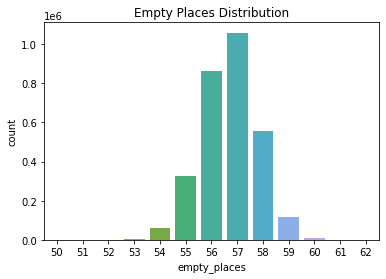

In [12]:
print(df.empty_places.value_counts())
sns.countplot(data=df, x="empty_places")
plt.title("Empty Places Distribution")
plt.show()

In [13]:
def empty_places_per_row(puzzle):
  row = []
  count = 0
  for i in range(81):
    if (puzzle[i] == '.'):
      count += 1

    if ((i+1)%9 == 0):
      row.append(count)
      count = 0

  return row

In [14]:
df["empty_per_row"] = df["puzzle"].apply(empty_places_per_row)
df.head()

,id,puzzle,solution,clues,difficulty,empty_places,empty_per_row
0,1,1..5.37..6.3..8.9......98...1.......8761.........,1985437266432785915276198439147352688761924352...,27,2.2,54,"[5, 5, 7, 8, 5, 8, 8, 4, 4]"
1,2,...81.....2........1.9..7...7..25.934.2..........,9348172567286534196159427381764258934523981673...,23,0.0,58,"[7, 8, 6, 4, 7, 8, 6, 5, 7]"
2,3,..5...74.3..6...19.....1..5...7...2.9....58..7...,2159837463876542194692713855387169249413258677...,25,2.6,56,"[6, 5, 7, 7, 6, 6, 6, 7, 6]"
3,4,........5.2...9....9..2...373..481.....36....5...,4738169256285397411954278637329481569413652785...,26,1.4,55,"[8, 7, 6, 4, 7, 6, 5, 7, 5]"
4,5,.4.1..............653.....1.8.9..74...24..91.....,9471536821286493576532874913819267455724389164...,25,1.1,56,"[7, 9, 5, 5, 5, 7, 6, 6, 6]"


In [15]:
df["empty_per_row_std"] = df["empty_per_row"].apply(lambda x: np.std(x))

In [16]:
df["empty_per_row_mean"] = df["empty_per_row"].apply(lambda x: np.mean(x))

In [17]:
df["empty_per_row_mode"] = df["empty_per_row"].apply(lambda x: max(x, key=x.count))
df.head()

,id,puzzle,solution,clues,difficulty,empty_places,empty_per_row,empty_per_row_std,empty_per_row_mean,empty_per_row_mode
0,1,1..5.37..6.3..8.9......98...1.......8761.........,1985437266432785915276198439147352688761924352...,27,2.2,54,"[5, 5, 7, 8, 5, 8, 8, 4, 4]",1.632993,6.000000,5
1,2,...81.....2........1.9..7...7..25.934.2..........,9348172567286534196159427381764258934523981673...,23,0.0,58,"[7, 8, 6, 4, 7, 8, 6, 5, 7]",1.257079,6.444444,7
2,3,..5...74.3..6...19.....1..5...7...2.9....58..7...,2159837463876542194692713855387169249413258677...,25,2.6,56,"[6, 5, 7, 7, 6, 6, 6, 7, 6]",0.628539,6.222222,6
3,4,........5.2...9....9..2...373..481.....36....5...,4738169256285397411954278637329481569413652785...,26,1.4,55,"[8, 7, 6, 4, 7, 6, 5, 7, 5]",1.196703,6.111111,7
4,5,.4.1..............653.....1.8.9..74...24..91.....,9471536821286493576532874913819267455724389164...,25,1.1,56,"[7, 9, 5, 5, 5, 7, 6, 6, 6]",1.227262,6.222222,5


6.333333    1058407
6.222222     865548
6.444444     556412
6.111111     327826
6.555556     115931
6.000000      61228
6.666667       8204
5.888889       5926
5.777778        297
6.777778        210
5.666667          9
5.555556          1
6.888889          1
Name: empty_per_row_mean, dtype: int64


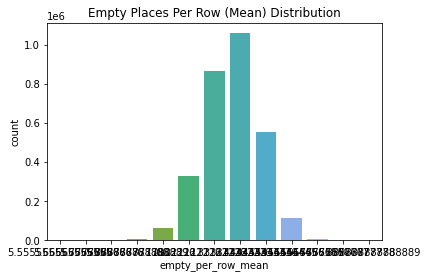

In [18]:
print(df["empty_per_row_mean"].value_counts())
sns.countplot(data=df, x="empty_per_row_mean")
plt.title("Empty Places Per Row (Mean) Distribution")
plt.show()

6    1503925
7    1036328
5     368754
8      81045
4       8996
9        926
3         26
Name: empty_per_row_mode, dtype: int64


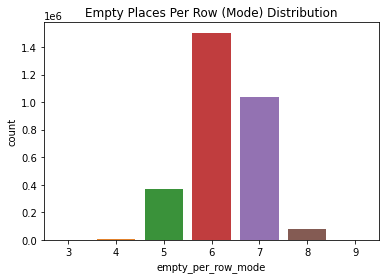

In [19]:
print(df["empty_per_row_mode"].value_counts())
sns.countplot(data=df, x="empty_per_row_mode")
plt.title("Empty Places Per Row (Mode) Distribution")
plt.show()

0.942809    203764
1.154701    161293
0.916246    142999
1.030402    132130
1.133115    130198
             ...  
1.943651         1
2.114033         1
2.165954         1
1.685083         1
2.309401         1
Name: empty_per_row_std, Length: 150, dtype: int64


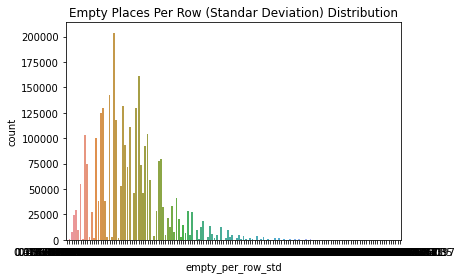

In [20]:
print(df["empty_per_row_std"].value_counts())
sns.countplot(data=df, x="empty_per_row_std")
plt.title("Empty Places Per Row (Standar Deviation) Distribution")
plt.show()

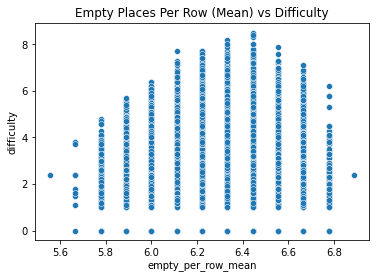

In [21]:
sns.scatterplot(data=df, x="empty_per_row_mean", y="difficulty")
plt.title("Empty Places Per Row (Mean) vs Difficulty")
plt.show()

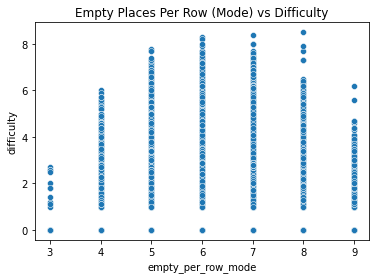

In [22]:
sns.scatterplot(data=df, x="empty_per_row_mode", y="difficulty")
plt.title("Empty Places Per Row (Mode) vs Difficulty")
plt.show()

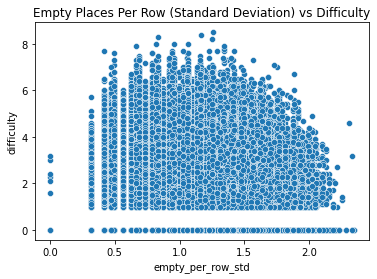

In [23]:
sns.scatterplot(data=df, x="empty_per_row_std", y="difficulty")
plt.title("Empty Places Per Row (Standard Deviation) vs Difficulty")
plt.show()

### Clue Distribution
We can see that the clues feature is somewhat normally distributed and centered at about 24. The vast majority of clues are between 23 and 26.

24    1058407
25     865548
23     556412
26     327826
22     115931
27      61228
21       8204
28       5926
29        297
20        210
30          9
31          1
19          1
Name: clues, dtype: int64


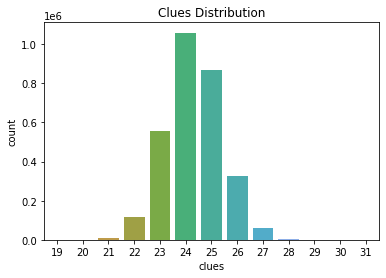

In [24]:
print(df["clues"].value_counts())
sns.countplot(data=df, x="clues")
plt.title("Clues Distribution")
plt.show()

### Difficulty Distribution
We can see that the difficulty feature is very right skewed. The vast majority of difficulties are 0. Generally, as the difficulty increases, there are less samples. This may make it difficult to find patterns for higher difficulties because there are very little samples to train on.

Counts:
 0.0    1294081
1.0      91570
1.4      85081
1.5      84909
1.6      83935
        ...   
7.8          1
8.5          1
8.2          1
8.3          1
8.4          1
Name: difficulty, Length: 76, dtype: int64

More than 100 instances:
 0.0    1294081
1.0      91570
1.4      85081
1.5      84909
1.6      83935
1.3      83737
1.7      81066
1.2      78932
1.8      78911
1.9      76141
2.0      73067
2.1      70059
1.1      68137
2.2      66185
2.3      62485
2.4      58971
2.5      55218
2.6      51266
2.7      48165
2.8      45056
2.9      40702
3.0      37421
3.1      34114
3.2      31191
3.3      27770
3.4      25096
3.5      22476
3.6      20098
3.7      17528
3.8      15585
3.9      13623
4.0      11795
4.1      10226
4.2       9016
4.3       7607
4.4       6510
4.5       5607
4.6       4651
4.7       3970
4.8       3258
4.9       2762
5.0       2236
5.1       1930
5.2       1544
5.3       1200
5.4       1027
5.5        794
5.6        639
5.7        554
5.8        425
5.9   

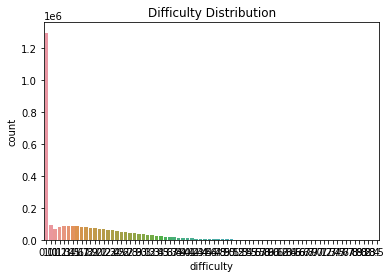

In [25]:
difficulties = df["difficulty"].value_counts()
print("Counts:\n", difficulties)
print()
print("More than 100 instances:\n", difficulties.loc[difficulties > 100])
sns.countplot(data=df, x="difficulty")
plt.title("Difficulty Distribution")
plt.show()

### Difficulty Distribution Per Clues
The difficulty distributions per each clue count with significant sample counts are still very similarly right skewed like the overall distribution, so the number of clues is not a good indicator of difficulty.

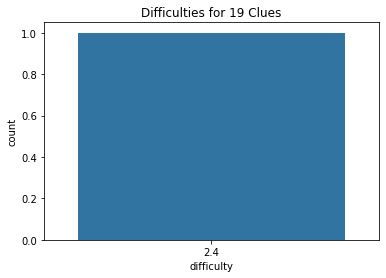

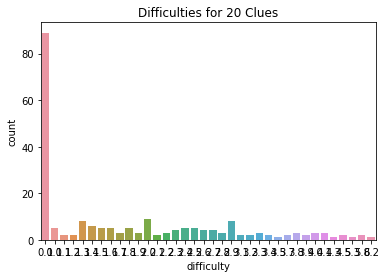

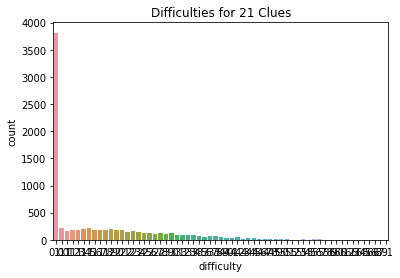

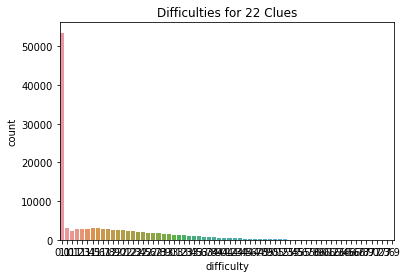

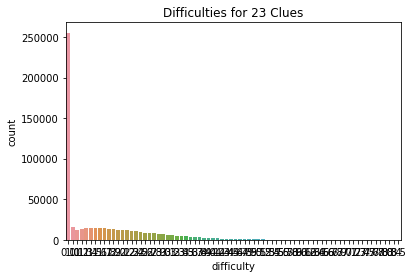

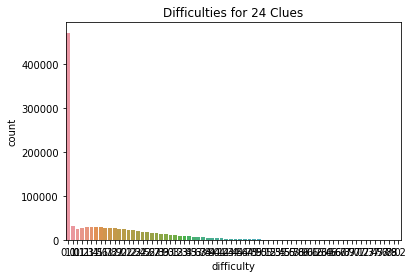

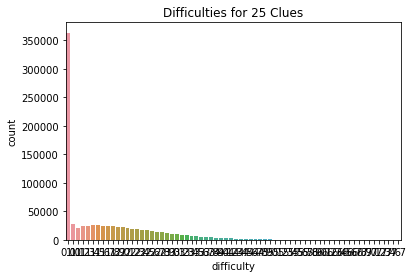

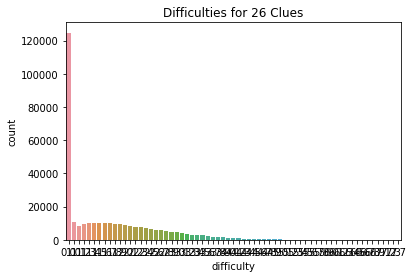

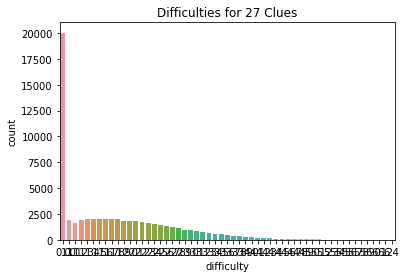

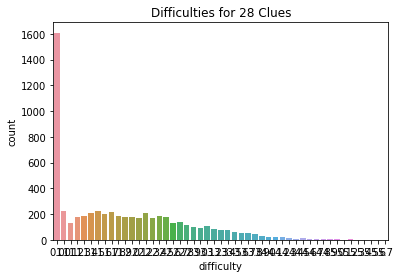

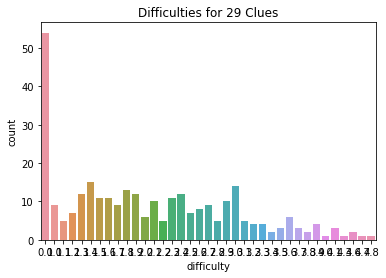

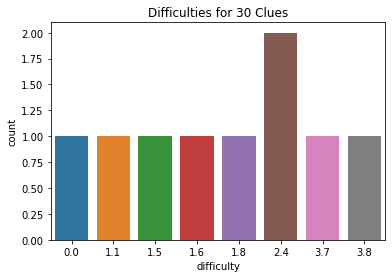

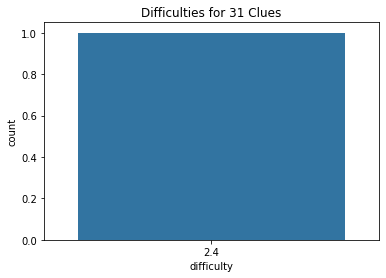

In [26]:
for clue in sorted(df["clues"].unique()):
    clue_df = df[df["clues"] == clue]
    sns.countplot(data=clue_df, x="difficulty")
    plt.title(f"Difficulties for {clue} Clues")
    plt.show()

### Clues Distribution Per Difficulty
All difficulties have nearly the same clues distribution shape, so again the number of clues is not a good indicator of difficulty.

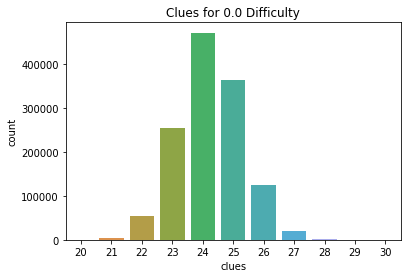

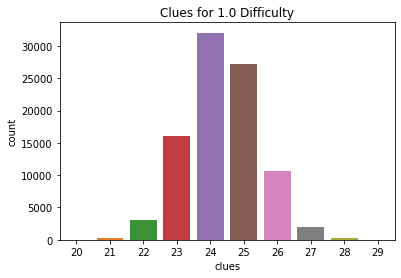

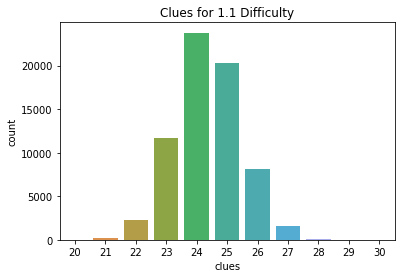

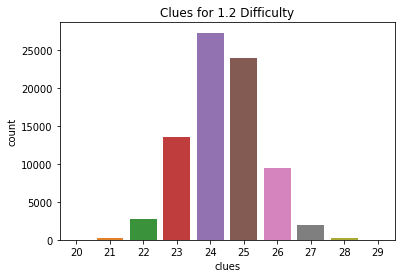

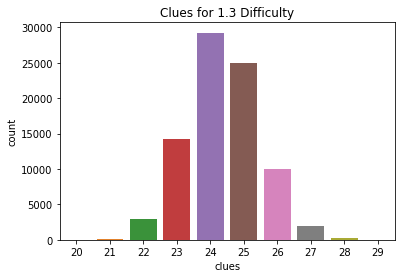

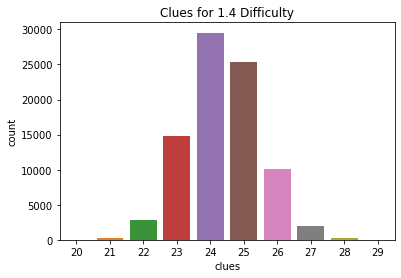

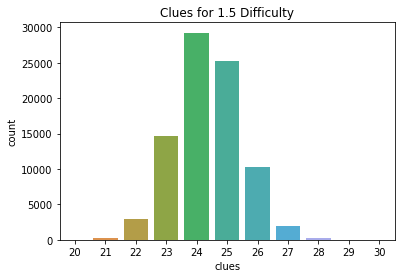

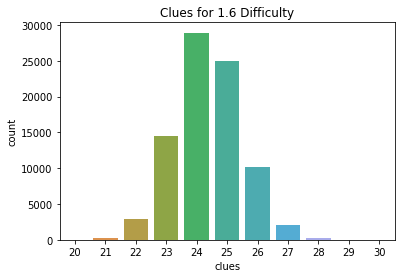

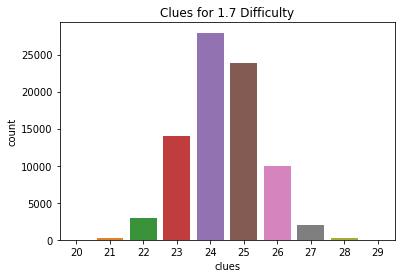

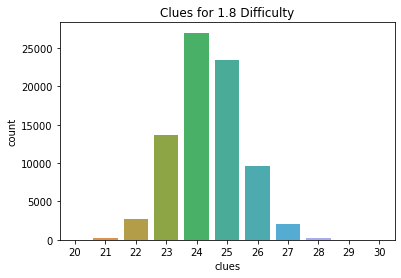

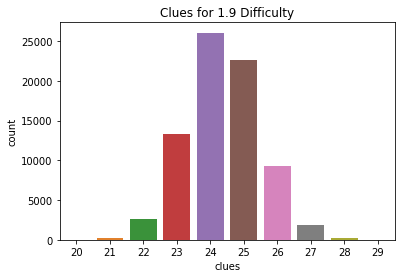

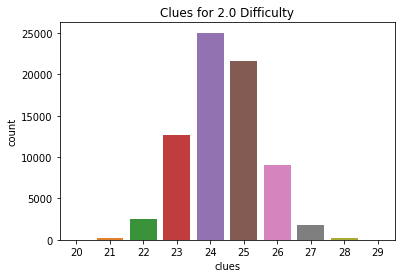

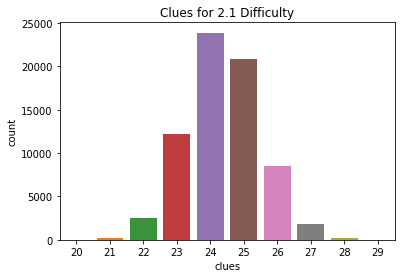

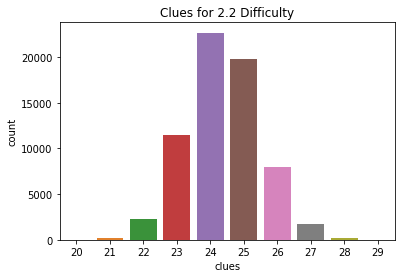

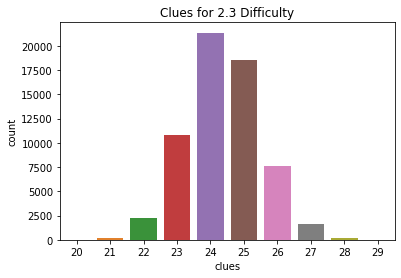

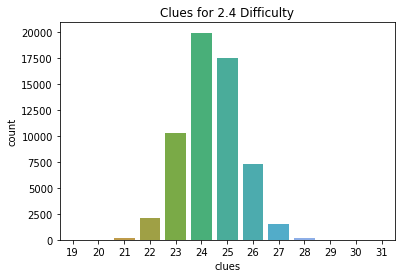

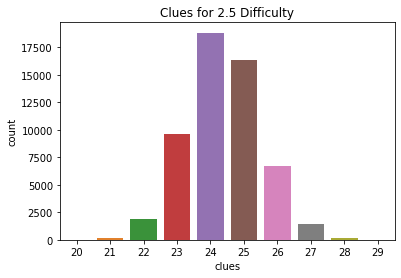

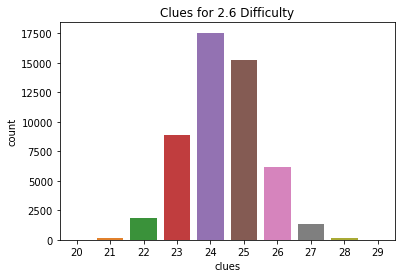

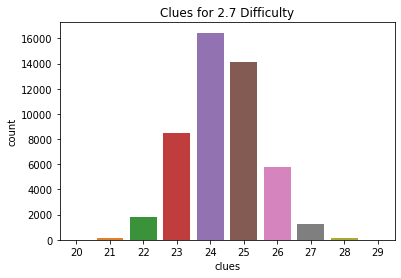

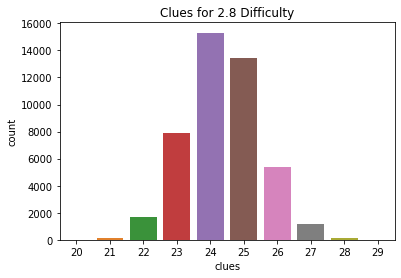

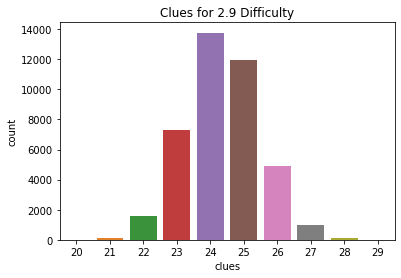

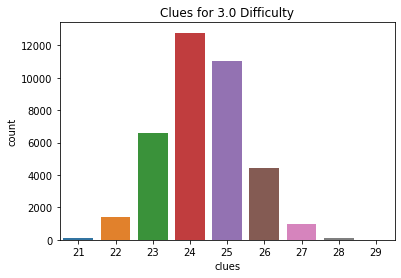

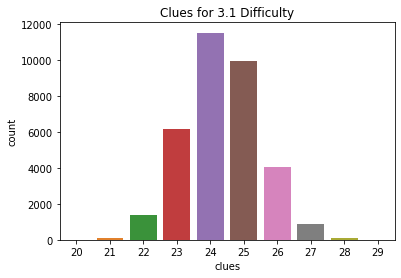

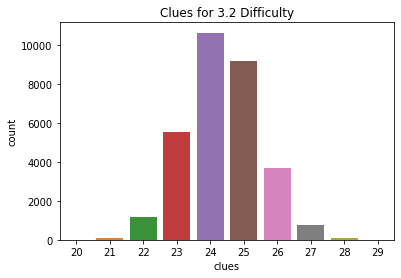

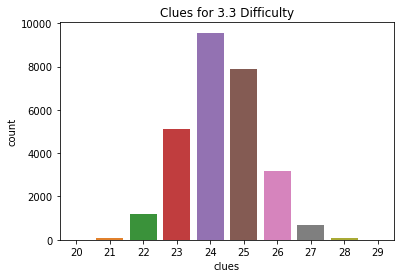

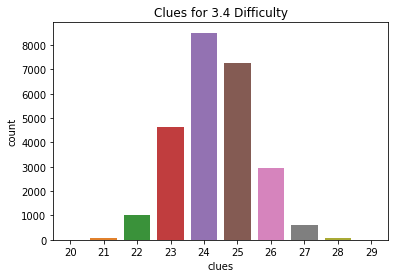

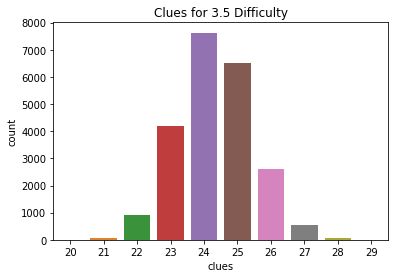

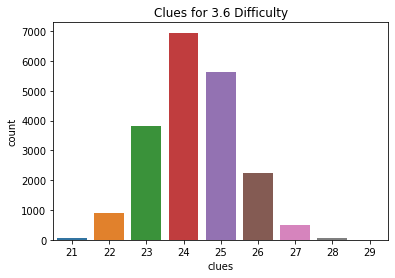

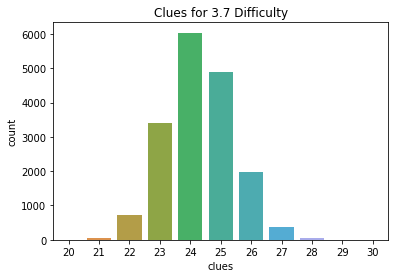

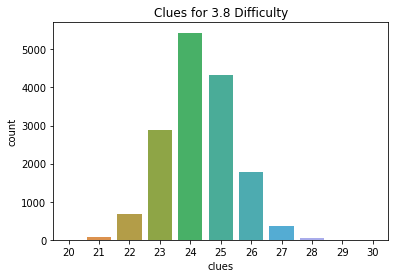

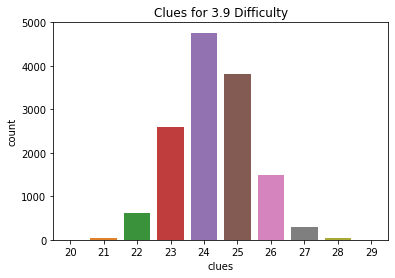

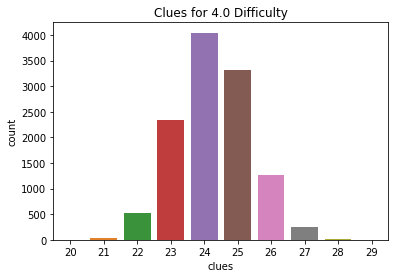

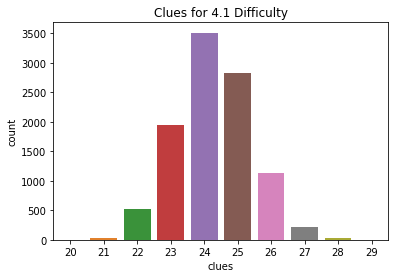

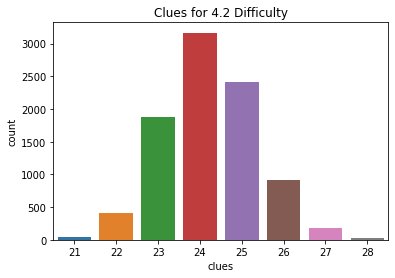

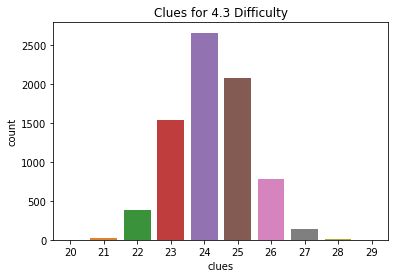

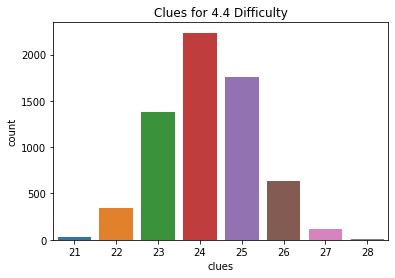

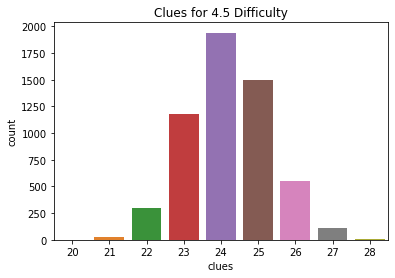

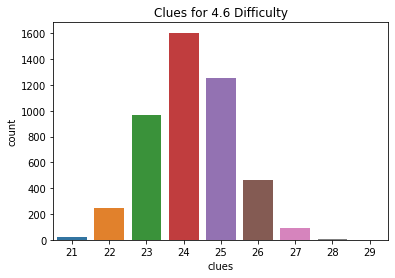

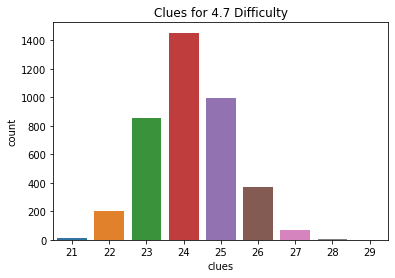

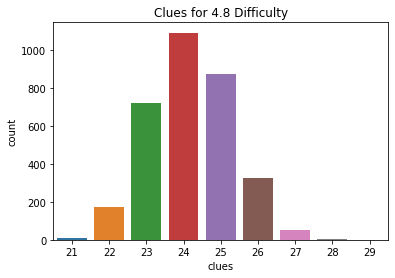

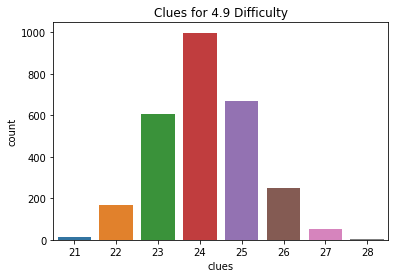

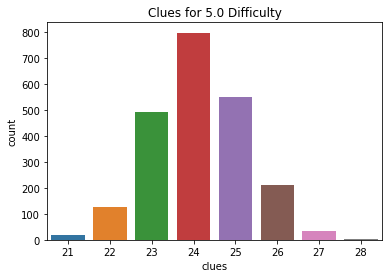

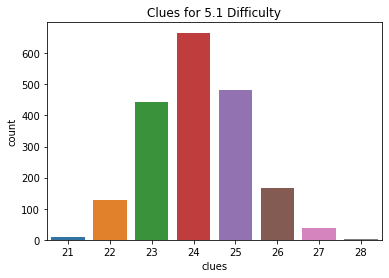

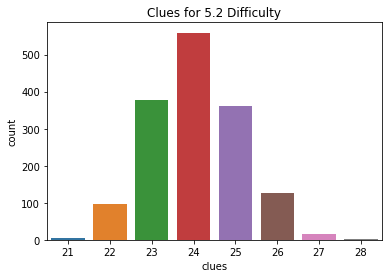

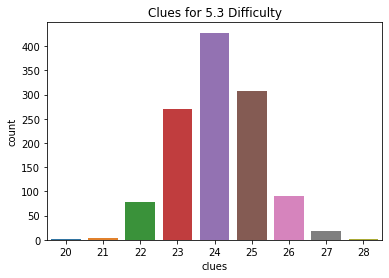

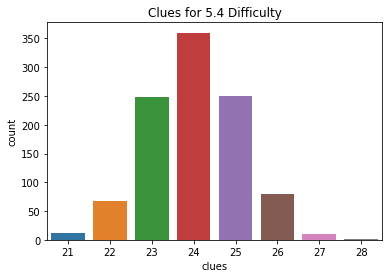

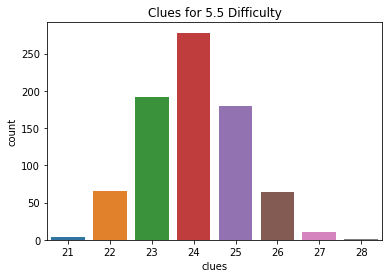

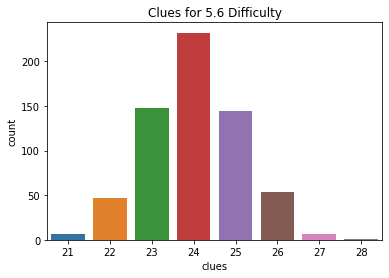

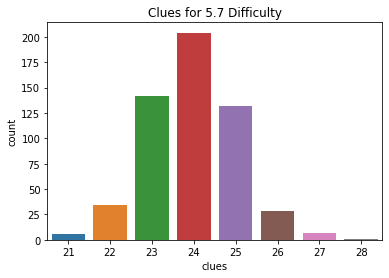

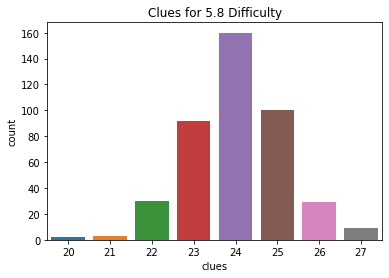

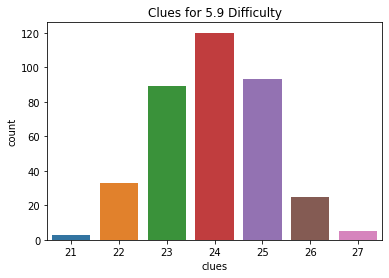

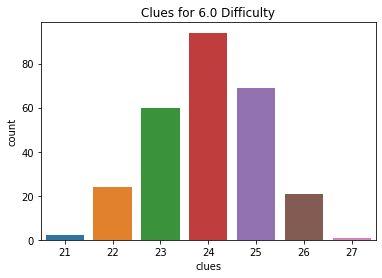

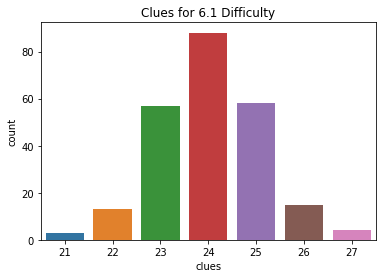

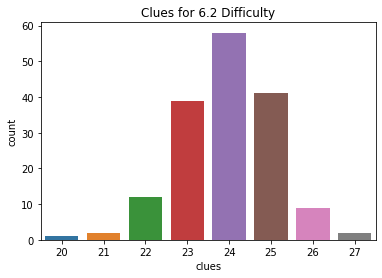

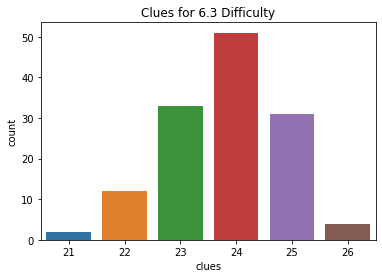

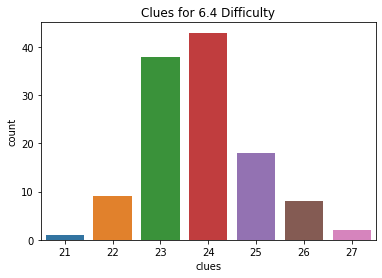

In [27]:
difficulty_counts = df["difficulty"].value_counts()
difficulty_counts = difficulty_counts.loc[difficulty_counts > 100]
for difficulty in sorted(difficulty_counts.index):
    difficulty_df = df[df["difficulty"] == difficulty]
    sns.countplot(data=difficulty_df, x="clues")
    plt.title(f"Clues for {difficulty} Difficulty")
    plt.show()

### Reduce Zero Difficulty Samples
- There are more than 1 million samples with zero difficulty
- Reducing the number of zero difficulty samples to 100,000

In [28]:
n_drop = len(df[df["difficulty"] == 0]) - 100000
df = df.drop(df[df["difficulty"] == 0].sample(n_drop, random_state=1).index)
df

,id,puzzle,solution,clues,difficulty,empty_places,empty_per_row,empty_per_row_std,empty_per_row_mean,empty_per_row_mode
0,1,1..5.37..6.3..8.9......98...1.......8761.........,1985437266432785915276198439147352688761924352...,27,2.2,54,"[5, 5, 7, 8, 5, 8, 8, 4, 4]",1.632993,6.000000,5
2,3,..5...74.3..6...19.....1..5...7...2.9....58..7...,2159837463876542194692713855387169249413258677...,25,2.6,56,"[6, 5, 7, 7, 6, 6, 6, 7, 6]",0.628539,6.222222,6
3,4,........5.2...9....9..2...373..481.....36....5...,4738169256285397411954278637329481569413652785...,26,1.4,55,"[8, 7, 6, 4, 7, 6, 5, 7, 5]",1.196703,6.111111,7
4,5,.4.1..............653.....1.8.9..74...24..91.....,9471536821286493576532874913819267455724389164...,25,1.1,56,"[7, 9, 5, 5, 5, 7, 6, 6, 6]",1.227262,6.222222,5
7,8,38.1.........5.6.....9....3.4.........5.18.......,3861729544198536725279468137413652986952184372...,25,3.7,56,"[6, 7, 7, 8, 6, 5, 4, 7, 6]",1.133115,6.222222,6
...,...,...,...,...,...,...,...,...,...,...
2999993,2999994,2......8.........6....82.97.431...2.8..3.........,2794635815387192464165823979431567288273946151...,25,0.0,56,"[7, 8, 5, 5, 7, 5, 5, 6, 8]",1.227262,6.222222,5
2999994,2999995,...3...61..4.......5....4.22.8...3....9.1.82.....,8273549611942765383561984722784653195697138244...,24,1.5,57,"[6, 8, 6, 6, 5, 8, 8, 4, 6]",1.333333,6.333333,6
2999995,2999996,7..........2......9.6.28.1....28..3.......5.4....,7834512964129768539563284175712846392691375848...,23,5.0,58,"[8, 8, 4, 6, 7, 7, 5, 7, 6]",1.257079,6.444444,7
2999996,2999997,.5......2...58...1..7..16....2...4...849.3...9...,1594368722465879318372916543126754896849237159...,24,4.1,57,"[7, 6, 6, 7, 5, 7, 6, 5, 8]",0.942809,6.333333,7


In [29]:
print("Total record count:", len(df))
print("Records with zero difficulty:", len(df[df["difficulty"] == 0]))

Total record count: 1805919
Records with zero difficulty: 100000


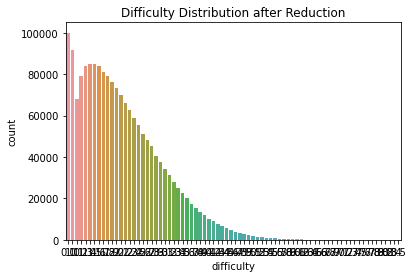

In [30]:
sns.countplot(data=df, x="difficulty")
plt.title("Difficulty Distribution after Reduction")
plt.show()

### Data Cleaning
- Remove "id" feature
- Convert periods in "puzzle" feature to zeros
- Split "puzzle" feature into 81 individual features

In [31]:
# Remove "id" feature
df = df.drop(columns=["id"])
df.head()

,puzzle,solution,clues,difficulty,empty_places,empty_per_row,empty_per_row_std,empty_per_row_mean,empty_per_row_mode
0,1..5.37..6.3..8.9......98...1.......8761.........,1985437266432785915276198439147352688761924352...,27,2.2,54,"[5, 5, 7, 8, 5, 8, 8, 4, 4]",1.632993,6.000000,5
2,..5...74.3..6...19.....1..5...7...2.9....58..7...,2159837463876542194692713855387169249413258677...,25,2.6,56,"[6, 5, 7, 7, 6, 6, 6, 7, 6]",0.628539,6.222222,6
3,........5.2...9....9..2...373..481.....36....5...,4738169256285397411954278637329481569413652785...,26,1.4,55,"[8, 7, 6, 4, 7, 6, 5, 7, 5]",1.196703,6.111111,7
4,.4.1..............653.....1.8.9..74...24..91.....,9471536821286493576532874913819267455724389164...,25,1.1,56,"[7, 9, 5, 5, 5, 7, 6, 6, 6]",1.227262,6.222222,5
7,38.1.........5.6.....9....3.4.........5.18.......,3861729544198536725279468137413652986952184372...,25,3.7,56,"[6, 7, 7, 8, 6, 5, 4, 7, 6]",1.133115,6.222222,6


In [4]:
# Convert periods in "puzzle" feature to zeros
df["puzzle"] = df["puzzle"].apply(lambda x: x.replace(".", "0"))
df.head()

,id,puzzle,solution,clues,difficulty
0,1,1005037006030080900000098000100000008761000000...,1985437266432785915276198439147352688761924352...,27,2.2
1,2,0008100000200000000109007000700250934020000000...,9348172567286534196159427381764258934523981673...,23,0.0
2,3,0050007403006000190000010050007000209000058007...,2159837463876542194692713855387169249413258677...,25,2.6
3,4,0000000050200090000900200037300481000003600005...,4738169256285397411954278637329481569413652785...,26,1.4
4,5,0401000000000000006530000010809007400024009100...,9471536821286493576532874913819267455724389164...,25,1.1


In [33]:
# Split "puzzle" feature into 81 individual features
X = df["puzzle"].str.split("", expand=True)
for i in range(81):
    df[f"x{i}"] = X[i + 1].astype(int)
df.head()

,puzzle,solution,clues,difficulty,empty_places,empty_per_row,empty_per_row_std,empty_per_row_mean,empty_per_row_mode,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80
0,1005037006030080900000098000100000008761000000...,1985437266432785915276198439147352688761924352...,27,2.2,54,"[5, 5, 7, 8, 5, 8, 8, 4, 4]",1.632993,6.000000,5,1,0,0,5,0,3,7,0,0,6,0,3,0,0,8,0,9,0,0,0,0,0,0,9,8,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,7,0,8,0,9,0,7,6,0,4,7,0,0,0,6,0,3,1,2
2,0050007403006000190000010050007000209000058007...,2159837463876542194692713855387169249413258677...,25,2.6,56,"[6, 5, 7, 7, 6, 6, 6, 7, 6]",0.628539,6.222222,6,0,0,5,0,0,0,7,4,0,3,0,0,6,0,0,0,1,9,0,0,0,0,0,1,0,0,5,0,0,0,7,...,5,8,0,0,7,0,0,8,4,0,0,0,0,0,0,3,0,9,0,0,0,2,0,9,0,4,0,0,0,0,0,8,0,0,0,0,0,1,0,3
3,0000000050200090000900200037300481000003600005...,4738169256285397411954278637329481569413652785...,26,1.4,55,"[8, 7, 6, 4, 7, 6, 5, 7, 5]",1.196703,6.111111,7,0,0,0,0,0,0,0,0,5,0,2,0,0,0,9,0,0,0,0,9,0,0,2,0,0,0,3,7,3,0,0,...,0,0,0,0,5,8,0,0,0,0,4,0,0,0,1,0,0,0,3,5,8,0,0,0,4,2,0,0,0,0,0,0,0,9,7,8,0,0,0,2
4,0401000000000000006530000010809007400024009100...,9471536821286493576532874913819267455724389164...,25,1.1,56,"[7, 9, 5, 5, 5, 7, 6, 6, 6]",1.227262,6.222222,5,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5,3,0,0,0,0,0,1,0,8,0,9,...,0,9,1,0,0,0,0,0,0,0,2,0,8,0,0,0,5,6,2,0,0,0,0,1,0,0,7,0,0,6,0,0,0,4,0,0,1,0,0,3
7,3801000000000506000009000030400000000050180000...,3861729544198536725279468137413652986952184372...,25,3.7,56,"[6, 7, 7, 8, 6, 5, 4, 7, 6]",1.133115,6.222222,6,3,8,0,1,0,0,0,0,0,0,0,0,0,5,0,6,0,0,0,0,0,9,0,0,0,0,3,0,4,0,0,...,8,0,0,0,0,0,0,0,9,0,5,6,1,0,6,0,0,2,4,7,8,0,8,0,0,0,0,0,0,0,6,0,0,4,0,8,0,0,2,0


### Relationship Between Clues and Difficulty - Linear Regression and Random Forest
There is not a clear cut relationship between clues and difficulty. I expected the relationship to clearly indicate that more clues results in lower difficulty. That is obviously not the case as seen from the plot. However, it can be noted that the maximum difficulty does somewhat have a relationship with clues. What surprised me was that the relationship was not monotonic. It seems the number of clues that results in the highest difficulty is 23. The max difficulty decreases as you increase the number of clues beyond 23. However, decreasing the number of clues below 23 also decreases the max difficulty, which I did not expect. Furthermore, training linear regression and random forest models using clues to predict difficulty yielded R squared values of nearly zero, further indicating that clues alone is not a good predictor for difficulty.

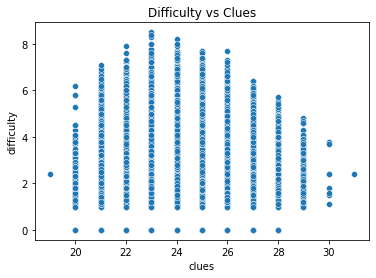

In [34]:
sns.scatterplot(data=df, x="clues", y="difficulty")
plt.title("Difficulty vs Clues")
plt.show()

In [35]:
# Using clues to predict difficulty
X = df["clues"].to_numpy().reshape(-1, 1)
y = df["difficulty"]

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
def clues_vs_difficulty(model):
    # Train model
    model.fit(X_train, y_train)

    # Predict values for train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Print R squared scores
    print("Train R2:", r2_score(y_train, y_train_pred))
    print("Test R2:", r2_score(y_test, y_test_pred))

In [37]:
clues_vs_difficulty(LinearRegression())

Train R2: 0.00012090641728434992
Test R2: 0.00013240041415940595


In [38]:
clues_vs_difficulty(RandomForestRegressor())

Train R2: 0.0004170701792699516
Test R2: 0.0005122611167789337


### Relationship Between Puzzle and Difficulty - Vanilla Neural Network
It seems a vanilla neural network cannot find any correlation between the raw puzzle and difficulty. It is very likely that the numbers themselves have no correlation towards difficulty, but rather whether or not they are occupied at all. Next, we try to convert all initial clues to the value one.

In [39]:
# Using puzzle to predict difficulty
X = df.loc[:, [f"x{i}" for i in range(81)]]
y = df["difficulty"]

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
model = Sequential()
model.add(InputLayer(input_shape=(81,)))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.summary()
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2624      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
45148/45148 [==============================] - 63s 1ms/step - loss: 1.0120
Epoch 2/2
45148/45148 [==============================] - 62s 1ms/step - loss: 1.0066


In [41]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train R2: -1.0159794006092682e-07
Test R2: -1.5232109753515743e-06


### Disregard Puzzle Values - Vanilla Neural Network
It seems a vanilla neural network cannot find any correlation between the puzzle and the difficulty, even after converting the clues to ones. Next, a convolutional neural network may be able to do better.

In [42]:
for i in range(81):
    feature = f"x{i}"
    df[feature] = (df[feature] != 0).astype(int)
df

,puzzle,solution,clues,difficulty,empty_places,empty_per_row,empty_per_row_std,empty_per_row_mean,empty_per_row_mode,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80
0,1005037006030080900000098000100000008761000000...,1985437266432785915276198439147352688761924352...,27,2.2,54,"[5, 5, 7, 8, 5, 8, 8, 4, 4]",1.632993,6.000000,5,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,1,1
2,0050007403006000190000010050007000209000058007...,2159837463876542194692713855387169249413258677...,25,2.6,56,"[6, 5, 7, 7, 6, 6, 6, 7, 6]",0.628539,6.222222,6,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,...,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,0000000050200090000900200037300481000003600005...,4738169256285397411954278637329481569413652785...,26,1.4,55,"[8, 7, 6, 4, 7, 6, 5, 7, 5]",1.196703,6.111111,7,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1
4,0401000000000000006530000010809007400024009100...,9471536821286493576532874913819267455724389164...,25,1.1,56,"[7, 9, 5, 5, 5, 7, 6, 6, 6]",1.227262,6.222222,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,...,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
7,3801000000000506000009000030400000000050180000...,3861729544198536725279468137413652986952184372...,25,3.7,56,"[6, 7, 7, 8, 6, 5, 4, 7, 6]",1.133115,6.222222,6,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999993,2000000800000000060000820970431000208003000000...,2794635815387192464165823979431567288273946151...,25,0.0,56,"[7, 8, 5, 5, 7, 5, 5, 6, 8]",1.227262,6.222222,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
2999994,0003000610040000000500004022080003000090108200...,8273549611942765383561984722784653195697138244...,24,1.5,57,"[6, 8, 6, 6, 5, 8, 8, 4, 6]",1.333333,6.333333,6,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0
2999995,7000000000020000009060280100002800300000005040...,7834512964129768539563284175712846392691375848...,23,5.0,58,"[8, 8, 4, 6, 7, 7, 5, 7, 6]",1.257079,6.444444,7,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2999996,0500000020005800010070016000020004000849030009...,1594368722465879318372916543126754896849237159...,24,4.1,57,"[7, 6, 6, 7, 5, 7, 6, 5, 8]",0.942809,6.333333,7,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [43]:
# Using puzzle to predict difficulty
X = df.loc[:, [f"x{i}" for i in range(81)]]
y = df["difficulty"]

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [44]:
model = Sequential()
model.add(InputLayer(input_shape=(81,)))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.summary()
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                2624      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
45148/45148 [==============================] - 63s 1ms/step - loss: 1.0106
Epoch 2/2
45148/45148 [==============================] - 61s 1ms/step - loss: 1.0058


In [45]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train R2: 0.0020441903885872748
Test R2: 0.0008827158193912554


### Convolutional Neural Network
Again, the results are not great and is not that much different than the vanilla neural network. Next, we try the same convolutional neural network again but disregarding the clue values.

In [ ]:
puzzles = df["puzzle"].apply(lambda x: np.array([int(clue) for clue in x]).reshape(9,9,1))
puzzles

In [ ]:
X = np.array(puzzles.values.tolist())
y = df["difficulty"].to_numpy()

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(9, 9, 1)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.summary()
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=1)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

### Disregarding Puzzle Values - Convolutional Neural Network
We are a little surprised that even this method failed to provide any positive results. There are many factors that could explain why we are not achieving the results we desire. It could be that our models are not complex enough to capture the true relationship between the puzzle and difficulty. It could also be that it is simply too hard to predict difficulty based on machine learning and data mining techniques. That could very well be the case because from our exploratory data analysis, there was incredible overlap between difficulties with very similar looking puzzles and numbers of clues.

In [5]:
puzzles = df["puzzle"].apply(lambda x: np.array([0 if clue == "0" else 1 for clue in x]).reshape(9,9,1))
puzzles

0          [[[1], [0], [0], [1], [0], [1], [1], [0], [0]]...
1          [[[0], [0], [0], [1], [1], [0], [0], [0], [0]]...
2          [[[0], [0], [1], [0], [0], [0], [1], [1], [0]]...
3          [[[0], [0], [0], [0], [0], [0], [0], [0], [1]]...
4          [[[0], [1], [0], [1], [0], [0], [0], [0], [0]]...
                                 ...                        
2999995    [[[1], [0], [0], [0], [0], [0], [0], [0], [0]]...
2999996    [[[0], [1], [0], [0], [0], [0], [0], [0], [1]]...
2999997    [[[0], [0], [0], [0], [0], [1], [0], [1], [1]]...
2999998    [[[0], [0], [0], [0], [0], [0], [1], [1], [0]]...
2999999    [[[1], [0], [1], [0], [0], [1], [0], [1], [0]]...
Name: puzzle, Length: 3000000, dtype: object

In [13]:
X = np.array(puzzles.values.tolist())
y = df["difficulty"].to_numpy()

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(9, 9, 1)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.summary()
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 9, 9, 32)          320       
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 2592)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                82976     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 92,577
Trainable params: 92,577
Non-trainable params: 0
_________________________________________________________________
75000/75000 [==============================] - 552

In [15]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train R2: 0.02081770840048569
Test R2: 0.019988472093645404


##Two more layers - Convolutional Neural Network
We figured the model was underfit and could do with more layers, which led to our next model. In this model, we added two more layers without considering clues values. And also added 'softmax' activation to the model. But the results are not satisfactory. As stated earlier, it's possible that our models aren't sophisticated enough to capture the underlying puzzle-difficulty relationship.

In [8]:
X = np.array(puzzles.values.tolist())
y = df["difficulty"].to_numpy()

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(9, 9, 1)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.add(Activation('softmax'))
model.summary()
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 9, 9, 32)          320       
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 flatten_1 (Flatten)         (None, 2592)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                82976     
                                                                 
 dense_3 (Dense)             (None, 1)                

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train R2: -0.035179575878042435
Test R2: -0.03503507348136359
